#ECCO project metadata#

Analysis of metdata for the ECCO project

Benjamin A. Laken (blaken@geo.uio.no)


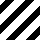
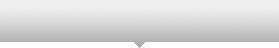
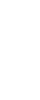
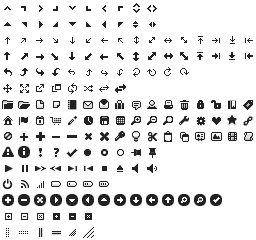
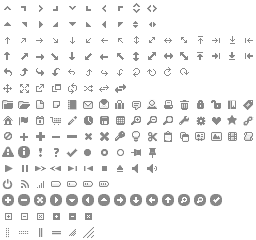
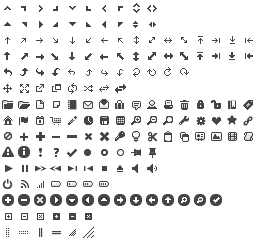
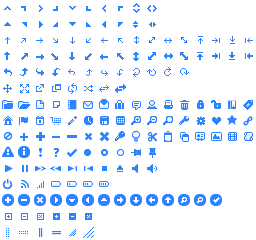
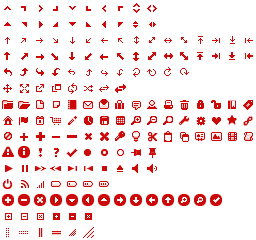
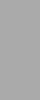
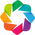
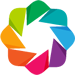
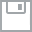
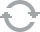
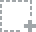
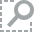
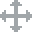
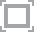
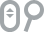

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import scipy.stats as ss
from bokeh.plotting import show, output_notebook
from bokeh.browserlib import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.models.glyphs import Circle
from bokeh.models import (
    GMapPlot, Range1d, ColumnDataSource, LinearAxis,
    PanTool, WheelZoomTool, BoxSelectTool,HoverTool,ResetTool,
    BoxSelectionOverlay, GMapOptions,ResizeTool,BoxZoomTool)
from bokeh.resources import INLINE

output_notebook()

In [14]:
meta = pd.read_csv('Metadata/Lake_Stats.csv')        # Very nice way of reading in all data.
meta.index = meta.Lake_ID                            # Index the metadata by lake ID's

meta = meta[0:len(meta)/10]  # Remove most of the data for testing...

In [15]:
# Create colours for lake circles  
color_map=[
    '#1A0F00','#331F00','#4C2E00','#663D00','#804C00',  # Orange scale
    '#995C00','#B26B00','#CC7A00','#E68A00','#FF9900',
    '#FFA319','#FFAD33','#FFB84D','#FFC266','#FFCC80',
    '#FFD699','#FFE0B2','#FFEBCC','#FFF5E6','#FFFFFF']
color_map = color_map[::-1]  # Reverse the list 

lk_color= [0] * len(meta.Dist3D)          # Initilize a blank list of correct lenght

base = 0.0
# km increments between 0 and >200
steps=[2.,2.,2.,2.,2.,20.,20.,20.,20.,20.,20,20.,20.,20.,20.,20.,20.,20.,20.,20.]
for n,step in enumerate(steps):
    tmp = np.where((meta.Dist3D >= base) & (meta.Dist3D <= (base+step)))
    #print('Catagory:',n,'Color:',color_map[n],'Norm. Rank of', base,'-->',
    #      base+step,' No:',len(tmp[0]))
    for nele in tmp[0]:
        lk_color[nele]= color_map[n]   # Here is where the color is added to a list 
    base += step

In [16]:
# Calculate radius of circles (size set by the rank of lake area)
ranked = ss.rankdata(meta.Area)      # Use the Scipy.stats.rankdata function to calculate rank of lakes by Area
ranked = (ranked/max(ranked))*0.01   # Normalize the rank and reduce the physical size of all

In [17]:
# Set the lakes to be plotted in a dictionary 
source = ColumnDataSource(
                    data=dict(
                        ID_list=meta.Lake_ID,
                        lat=meta.Lat,
                        lon=meta.Lon,
                        fill=lk_color,
                        size=ranked
                            )
                        )

In [18]:
x_range = Range1d()
y_range = Range1d()

map_options = GMapOptions(lat=64., lng=19., zoom=4)

plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title = "ECCO lakes", plot_width=800, plot_height=500
)
plot.map_options.map_type="terrain"

circle = Circle(x="lon", y="lat", radius='size', fill_color="fill", line_color=None,fill_alpha=0.9)
plot.add_glyph(source, circle)

pan = PanTool()
wheel_zoom = WheelZoomTool()
box_zoom = BoxZoomTool()
hover = HoverTool()
resize = ResizeTool()
reset = ResetTool()

hover.snap_to_data = True
hover.tooltips = [
    ("Lake ID", "@ID_list"),
    ("Lon.(°E), Lat.(°N)", "($x, $y)"),
    #("Alt.(m)", "@z"),
    #("Country","@Ctry"),
    #("Area (km&sup2;)","@Area"),
    #("Dist. to coast (km)","@Inland"),
]

plot.add_tools(pan,wheel_zoom, box_zoom,resize,hover, reset)

xaxis = LinearAxis(axis_label="lon.", major_tick_in=0)
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis(axis_label="lat.", major_tick_in=0)
plot.add_layout(yaxis, 'left')

In [19]:
show(plot)